# The Breit-Wigner parameterization
This program computes the Breit-Wigner propagator $A(s)$ for a single, isolated and narrow resonance $R$ with a smooth background. To do so, we only look at two body decays like 
$$R \rightarrow 1 + 2 \quad \text{channel }a$$ The masses of the particles are labeled accordingly.
There are multiple lineshapes that are called "Breit-Wigner parameterization". The simplest is the single channel Breit-Wigner lineshape with a constant width. Here, we assume that the resonance only couples to one channel (channel a in this case) and has an s-independent width. This parameterization can be used only, if there is no relevant threshold in the vicinity of the resonance. This is the first lineshape that we are going to be looking at. To compare we will next implement a single channel Breit-Wigner function with dynamic width. The Breit-Wigner parameterization that is used the most is the so called "relativistic Breit-Wigner parameterization". It considers a resonances that not only couples to channel a, but to a set of other channels b$_i, i = 0,1,2,...,n$, for example:$$R \rightarrow 3 + 4 \quad \text{channel }b_{0}$$

First, we import some useful libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, HBox, Layout, VBox
from IPython.display import display,clear_output
import plotly.graph_objects as go
from datetime import datetime
from matplotlib.pyplot import figure
import os
if not os.path.exists("images"):
    os.mkdir("images")
np.seterr(divide='ignore', invalid='ignore')
print('start programm:'+datetime.now().strftime("(%H:%M:%S.%f)"))

start programm:(10:39:59.052011)


Please enter your data for channel $a$ (it can be changed later):<br>
(The data for the other channels can be inserted below, before the multi-channel Breit-Wigner lineshape is plotted)

In [2]:
#import the needed data:

#resonance mass in MeV:
mass = 4039
#width of the resonance in MeV:
delta = 80
#constant that is used for the constant-width Breit-Wigner lineshape:
aTilde = 1
#masses of the channel that the resonance decays into:
m1a = 0.51
m2a = 0.51
#coupling of the channel:
gFaka = 4025
#angular momentum of the channel a:
la = 0
#proportionality factor of the numerator function:
alpha = 1

First, an energy range needs to be chosen that will be used for all the plots. It is recommended to choose e.g. \[mass-500MeV,mass+500MeV\] to see the interesting part of the lineshape around the resonance mass.
The ranges of the plots can still be changed separately in the code cells of the plots.

In [3]:
#please enterenergy range in MeV:
left = 3500
right = 4500

Next, we calculate a list of complex numbers that will be used throughout the Notebook to visualize the functions:

In [4]:
xrange_left = left
xrange_right = right

limitL = xrange_left**2
limitU = xrange_right**2

#create a number of x values
imag = 0
dev_x = np.linspace(limitL,limitU,num=200)
listx = []
for i in range(0,len(dev_x)):
    listx.append(complex(dev_x[i],imag)) 


We now implement the momentum of the particles in their center-of-momentum frame: <br>
$ q_i = \frac{\lambda^{1/2}(s,m_{1,i}^{2},m_{2,i}^{2})}{2 \sqrt{s}} $
 with <br>  $\lambda (s,m_{1,i}^{2},m_{2,i}^{2}) = s^2 + m_{1,i}^{4} + m_{2,i}^{4} - 2sm_{1,i}^{2} - 2m_{1,i}^{2}m_{2,i}^{2}-2m_{2,i}^{2}s = (s-(m_{1,i}+m_{2,i})^2) \cdot (s-(m_{1,i}-m_{2,i})^2)$, $i \in \{ a,b_0,... \}$

In [5]:
#function to calculate the momentum:
#for the Breit-Wigner lineshape: below the threshold of a channel we assume the momentum of this channel to be zero
def q(s, m1, m2):
    if (np.sqrt(s).real <= m1 + m2):
        return 0
    else:
        return (np.sqrt(s**2 + m1**4 + m2**4 - 2.*s*m1**2 - 2.*m1**2*m2**2 - 2.*m2**2*s))/(2*np.sqrt(s))

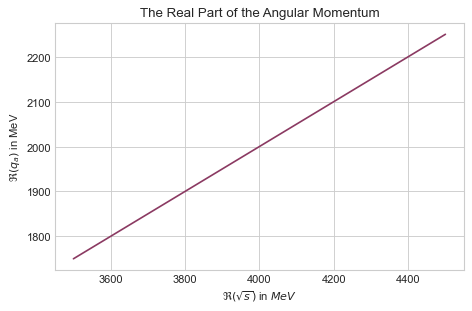

In [6]:
#plot the momentum q_a
figure(figsize=(6, 4), dpi=80)
func = []
for j in range(0,len(listx)):
    func.append(q(listx[j],m1a,m2a).real) 
plt.style.use('seaborn-whitegrid')
plt.plot(np.sqrt(listx).real, func, color = '#8B3A62')
plt.xlabel(r'$\Re{(\sqrt{s})}$ in $MeV$')
plt.ylabel(r'$\Re{(q_a)}$ in MeV')
plt.title('The Real Part of the Angular Momentum')
plt.tight_layout()
plt.show()

Calculation of the factor $\rho_i(s)$ that is related to the two body phase space and needed to calculate the parametrization width:
$$\rho_i (s) = \frac{2 q_i}{16 \pi \sqrt{s}}$$

In [7]:
def rho(s,m1,m2):
    return 2.*q(s,m1,m2)/(16.*np.pi*np.sqrt(s))

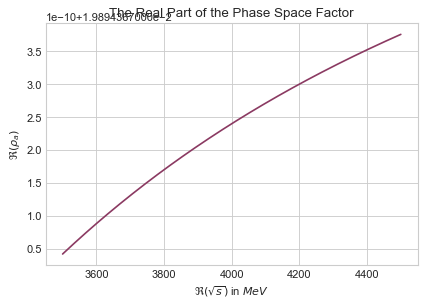

In [8]:
figure(figsize=(6, 4), dpi=80)
func2 = []
for j in range(0,len(listx)):
    func2.append(rho(listx[j],m1a,m2a).real) 
plt.style.use('seaborn-whitegrid')
plt.plot(np.sqrt(listx).real, func2, color = '#8B3A62')
plt.xlabel(r'$\Re{(\sqrt{s})}$ in $MeV$')
plt.ylabel(r'$\Re{(\rho_a)}$')
plt.title('The Real Part of the Phase Space Factor')
plt.show()

Let's implement a single channel Breit-Wigner function for a constant width:
$$ A_{\text{const}}(s) = \frac{\tilde{\alpha}}{M_{BW}^2-s-iM_{BW}\Gamma_{BW}}$$

In [9]:
def ampConst(s,aTilde,mass,delta):
    return aTilde /  (mass**2-s-1j*mass*delta)

### Single channel Breit-Wigner lineshape with a constant width

Plotting the lineshape of this Breit-Wigner parameterization with widgets here, enables us to see how the function changes with the input parameters (we are plotting the probability of this decay. To do that according to fermis golden rule, we have to multiply the quadratic absolute value of the propagator $A$ with the phase space)

In [31]:
print('start diagramm:'+datetime.now().strftime("(%H:%M:%S.%f)"))

#choose an imaginary part, that you want to plot your function for (the absolute value of the amplitude is a family of functions depending on the imaginary part of s):
imag = 0

#plot ranges:
#insert ranges for sqrt(s) (of the x axis):
xaxisL = left
xaxisU = right

#calculate the needed ranges for s:
lowlim = xaxisL**2
uplim = xaxisU**2


sReal=np.linspace(lowlim,uplim,num=800)


def plotfunc1(sReal,la,mass,alpha,m1a,m2a,gFaka,delta,aTilde):
    list = []
    for i in sReal:
        s = complex(i,imag)
        res = abs(ampConst(s,aTilde,mass,delta))**2*rho(s,m1a,m2a).real
        list.append(res)
    return list

def integrate1(la,mass,alpha,m1a,m2a,gFaka,delta,aTilde):
    #number of grid points:
    n = 11
    #size of one intervall:
    h = (uplim - lowlim) / (n-1)
    #make a list with all of the gridpoints that we are using:
    list = np.linspace(lowlim, uplim, n)
    #calculate the function at these grid points
    func = plotfunc1(list,la,mass,alpha,m1a,m2a,gFaka,delta,aTilde)
    #now calculate the integral:
    riemannL = h * sum(func[:n-1])
    return riemannL

def normalise1(sReal,la,mass,alpha,m1a,m2a,gFaka,delta,aTilde):
    res = []
    for i in range(0,len(sReal)):
        interim = abs(ampConst(complex(sReal[i],imag),aTilde,mass,delta))**2*rho(complex(sReal[i],imag),m1a,m2a).real
        res.append(interim/( integrate1(la,mass,alpha,m1a,m2a,gFaka,delta,aTilde)))
    return res

trace1 = go.Scatter(x=np.sqrt(sReal), y= normalise1(sReal,la,mass,alpha,m1a,m2a,gFaka,delta,aTilde))

lineshape1 = go.FigureWidget(data=[trace1],
                    layout=go.Layout(
                        title=dict(
                            text=r'$\textrm{Single channel Breit-Wigner parameterization, s-independent width}$'
                        ),
                        xaxis=dict(showline=True, zeroline=True, showgrid=True, showticklabels=True, linecolor = "black", title=dict(text=r'$\sqrt{\Re{(s)}} \quad \textrm{[MeV]}$')),
                        yaxis=dict(showline=True, zeroline=True, showgrid=True, showticklabels=True, linecolor = "black",title=dict(text=r'$|A|^2_a \cdot \Re{\rho_a}$'))
                    ))

#set the size of the plot:
lineshape1.layout.autosize = False
lineshape1.layout.width=650
lineshape1.layout.height = 600
lineshape1.layout.plot_bgcolor="white"
lineshape1.update_traces(line=dict(color="Blue", width=1.5))

lineshape1.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
lineshape1.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
lineshape1.update_yaxes(zeroline=True, zerolinewidth=2, zerolinecolor='LightGrey')

#lineshape1.layout.template = "simple_white"
#initialise all widgets in an interact enviroment and define an update function, that is called as soon as a parameter is changed using one of the widgets and immediately changes the plot:
def update( BreitWignerMass = mass, Mass1 = m1a, Mass2 = m2a, Delta = delta,Tild = aTilde):
    with lineshape1.batch_update(): 
        lineshape1.data[0].x = np.sqrt(sReal)
        lineshape1.data[0].y = normalise1(sReal,la,BreitWignerMass,alpha,Mass1,Mass2,gFaka,Delta,Tild)
        
w=interactive(update,
              BreitWignerMass = widgets.IntSlider(min=0.0,max=2.0*mass,step=1.0,value=mass,description=r'M:'),
              Mass1 = widgets.FloatSlider(value=m1a,min=0,max=5.*m1a,step=0.1,description=r'm$_1^a$:'),
              Mass2 =  widgets.FloatSlider(value=m2a,min=0,max=5.*m2a,step=0.1,description=r'm$_2^a$:'),    
              Delta = widgets.FloatSlider(value = delta, min = 0.0, max= 3*delta, step=0.1, description = r'$\Gamma$:'),
              Tild = widgets.FloatSlider(value = aTilde, min = 0.0, max= 100, step=0.1, description = r'$\tilde{\alpha}$:'))


box_layout = Layout(display='flex', flex_flow='row', justify_content='space-between', align_items='center')
Hbox_layout = Layout(display='flex', flex_flow='column', justify_content='space-between', align_items='center')


h1 = HBox([w.children[0],w.children[1]], layout=Hbox_layout)
h2 = HBox([w.children[2],w.children[3]], layout=Hbox_layout)
hSum_12 = HBox([h1,h2], layout=Hbox_layout)

#creating a large hbox:
HSum_first = HBox([hSum_12,w.children[4]], layout=Hbox_layout)

display(VBox([lineshape1,HSum_first], layout=box_layout))
lineshape1.write_image("images/wigner_1.pdf")
print('end diagramm:'+datetime.now().strftime("(%H:%M:%S.%f)"))

start diagramm:(10:46:00.477050)


    'data': [{'line': {'color': 'Blue', 'width': 1.5},
              'type': 'sc…

end diagramm:(10:46:00.735623)


### Single channel Breit-Wigner lineshape that has an energy dependent width

Let's implement the functions that we need for the numerator and width of the realtivistic Breit-Wigner lineshape.

We now calculate the Blatt Weisskopf form factors $F_l(z)$:
$$F_0^2 = 1$$
$$F_1^2(z) = \frac{1}{1+z^2}$$
$$F_2^2(z) = \frac{1}{9+3z^2+z^4}$$

In [11]:
#Blatt-Weisskopf form factors:
def weiss(z,la):
    if la != 0:
        if la ==1:
            return np.sqrt(1/(1+z**2))
        else:
            return np.sqrt(1/(9+ 3*z**2 + z**4))
    else:
        return 1

Calculation of the factor $n_i(s)$ of the numerator function:
$$n_i(s) = \left(\frac{q_i}{q_0}\right)^{l_i} F_{l_i}\left(\frac{q_i}{q_0}\right)$$
This factor only becomes important for waves with non zero angular momentum $l_i$.

In [12]:
def smallnum(s,la,m1,m2):
    q0=1;  #the breakup momentum which you get when m=m_BW you are on resonance 
    return (q(s,m1,m2)/q0)**la*weiss(q(s,m1,m2)/q0,la)

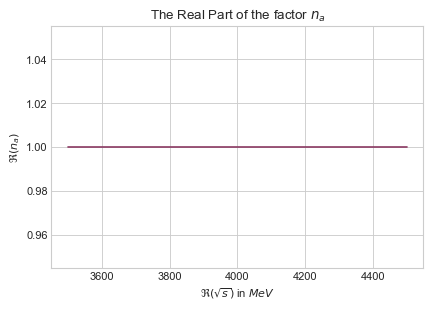

In [13]:
figure(figsize=(6, 4), dpi=80)
func3 = []
for j in range(0,len(listx)):
    func3.append(smallnum(listx[j],la,m1a,m2a).real) 
plt.style.use('seaborn-whitegrid')
plt.plot(np.sqrt(listx).real, func3, color = '#8B3A62')
plt.xlabel(r'$\Re{(\sqrt{s})}$ in $MeV$')
plt.ylabel(r'$\Re{(n_a)}$')
plt.title(r'The Real Part of the factor $n_a$')
plt.show()

Implementation of the Numerator function:
$$N_i (s) = \alpha g_i n_i(s) $$
$g_i$ is the pole coupling factor and characterizes the transition strength of the resonance to the channel i.
Differentiating between alpha and the coupling factor $g_i$ is not necessary. These parameters are often summarized to a factor $\delta = \alpha \cdot g_i$.
Any variation of both parameters can be expressed as a different variation of either one of them.

In [14]:
#numerator function
def num(s,alpha,la,m1,m2,gFak):
    return alpha*gFak*smallnum(s,la,m1,m2)

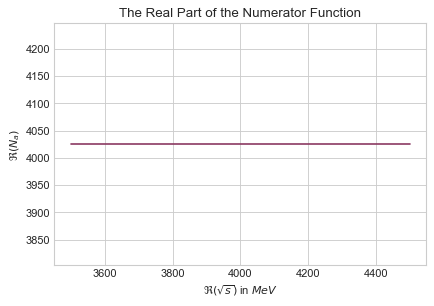

In [15]:
figure(figsize=(6, 4), dpi=80)
func4 = []
for j in range(0,len(listx)):
    func4.append(num(listx[j],alpha,la,m1a,m2a,gFaka).real) 
plt.style.use('seaborn-whitegrid')
plt.plot(np.sqrt(listx).real, func4, color = '#8B3A62')
plt.xlabel(r'$\Re{(\sqrt{s})}$ in $MeV$')
plt.ylabel(r'$\Re{(N_a)}$')
plt.title(r'The Real Part of the Numerator Function')
plt.show()

Finally, we implement the width of the lineshape: 

$$\Gamma (s) =  \sum_{i=a,b_0,...} g_i^2 \rho_i(s)n_i^2(s)$$

Since we only look at one channel the sum is unnecessary, but we will leave it there so we can reuse this function for the multi-channel Breit-Wigner lineshape. We will plot the width function later on as well, when we are looking at multiple channels.

In [16]:
def width(s,mass,lb,m1,m2,gFak):
   sum = 0.
   for i in range(0,len(gFak)):
       sum += gFak[i]**2*rho(s,m1[i],m2[i])*smallnum(s,lb[i],m1[i],m2[i])**2
   return sum

The propagator now reads: 
$$ A_i(s) = \frac{N_i(s)}{M_{BW}^2-s-i\Gamma(s)}$$

In [17]:
#now we need to implement the Breit-Wigner lineshape with an energy dependent width
def ampEnergy(s,la,mass,alpha,m1a,m2a,gFaka):
    return num(s,alpha,la,m1a,m2a,gFaka) /  (mass**2-s-1j*(width(s,mass,[la],[m1a],[m2a],[gFaka])))

In [30]:
#Time to plot:

print('start diagramm:'+datetime.now().strftime("(%H:%M:%S.%f)"))

#choose an imaginary part, that you want to plot your function for (the absolute value of the amplitude is a family of functions depending on the imaginary part of s):
imag = 0

#plot ranges:
#insert ranges for sqrt(s) (of the x axis):
xaxisL = left
xaxisU = right

#calculate the needed ranges for s:
lowlim = xaxisL**2
uplim = xaxisU**2


sReal=np.linspace(lowlim,uplim,num=800)


def plotfunc2(sReal,la,mass,alpha,m1a,m2a,gFaka):
    list = []
    for i in sReal:
        s = complex(i,imag)
        res = abs(ampEnergy(s,la,mass,alpha,m1a,m2a,gFaka))**2*rho(s,m1a,m2a).real
        list.append(res)
    return list

def integrate2(la,mass,alpha,m1a,m2a,gFaka):
    #number of grid points:
    n = 11
    #size of one intervall:
    h = (uplim - lowlim) / (n-1)
    #make a list with all of the gridpoints that we are using:
    list = np.linspace(lowlim, uplim, n)
    #calculate the function at these grid points
    func = plotfunc2(list,la,mass,alpha,m1a,m2a,gFaka)
    #now calculate the integral:
    riemannL = h * sum(func[:n-1])
    return riemannL

def normalise2(sReal,la,mass,alpha,m1a,m2a,gFaka):
    res = []
    for i in range(0,len(sReal)):
        interim = abs(ampEnergy(complex(sReal[i],imag),la,mass,alpha,m1a,m2a,gFaka))**2*rho(complex(sReal[i],imag),m1a,m2a).real
        res.append(interim/( integrate2(la,mass,alpha,m1a,m2a,gFaka)))
    return res

trace2 = go.Scatter(x=np.sqrt(sReal), y= normalise2(sReal,la,mass,alpha,m1a,m2a,gFaka))

lineshape2 = go.FigureWidget(data=[trace2],
                    layout=go.Layout(
                        title=dict(
                            text=r'$\textrm{single channel, relativistic Breit-Wigner parameterization}$'
                        ),
                        xaxis=dict(showline=True, zeroline=True, showgrid=True, showticklabels=True,linecolor = "Black", title=dict(text=r'$\sqrt{\Re{(s)}} \quad \textrm{[MeV]}$')),
                        yaxis=dict(showline=True, zeroline=True, showgrid=True, showticklabels=True, linecolor = "Black", title=dict(text=r'$|A|^2_a \cdot \Re{\rho_a}$'))
                    ))

#set the size of the plot:
lineshape2.layout.autosize = False
lineshape2.layout.width=650
lineshape2.layout.height = 600

lineshape2.layout.plot_bgcolor="white"
lineshape2.update_traces(line=dict(color="Blue", width=1.5))

lineshape2.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
lineshape2.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
lineshape2.update_yaxes(zeroline=True, zerolinewidth=2, zerolinecolor='LightGrey')

#set the style of the Dropdown widget for the imaginary part, so that you an see the entire description:
style = {'description_width': 'initial'}

#initialise all widgets in an interact enviroment and define an update function, that is called as soon as a parameter is changed using one of the widgets and immediately changes the plot:
def update(momentum_a = la, BreitWignerMass = mass, Alpha = alpha, Mass1 = m1a, Mass2 = m2a, Coupling_a = gFaka):
    with lineshape2.batch_update(): 
        lineshape2.data[0].x = np.sqrt(sReal)
        lineshape2.data[0].y = normalise2(sReal,momentum_a,BreitWignerMass,Alpha,Mass1,Mass2,Coupling_a)
        
w=interactive(update,
              momentum_a = widgets.IntSlider(value=la,min=0,max=2,step=1,description=r'l$_a$:'),
              BreitWignerMass = widgets.IntSlider(min=0.0,max=2.0*mass,step=1.0,value=mass,description=r'M:'),
              Alpha = widgets.IntSlider(value=alpha,min=alpha-2, max=alpha + 2,step=1,description=r'$\alpha$:'),
              Mass1 = widgets.FloatSlider(value=m1a,min=0,max=200,step=0.1,description=r'm$_1^a$:'),
              Mass2 =  widgets.FloatSlider(value=m2a,min=0,max=200,step=0.1,description=r'm$_2^a$:'),
              Coupling_a = widgets.FloatSlider(value=gFaka,min=0,max=10000.0,step=0.1,description=r'g$_a$'))


box_layout = Layout(display='flex', flex_flow='row', justify_content='space-between', align_items='center')
Hbox_layout = Layout(display='flex', flex_flow='column', justify_content='space-between', align_items='center')


h1 = HBox([w.children[0],w.children[1]], layout=Hbox_layout)
h2 = HBox([w.children[2],w.children[3]], layout=Hbox_layout)
hSum_12 = HBox([h1,h2], layout=Hbox_layout)
h3 = HBox([w.children[4],w.children[5]], layout=Hbox_layout)

#creating a large hbox:
HSum_first = HBox([hSum_12,h3], layout=Hbox_layout)

display(VBox([lineshape2,HSum_first], layout=box_layout))
lineshape2.write_image("images/wigner_2.pdf")
print('end diagramm:'+datetime.now().strftime("(%H:%M:%S.%f)"))

start diagramm:(10:44:34.650038)


    'data': [{'line': {'color': 'Blue', 'width': 1.5},
              'type': 'sc…

end diagramm:(10:44:35.152563)


### Comparison of the single channel Breit-Wigner lineshape with constant vs. energy dependendent width

In [35]:
#trace1 and trace2 shouls already be defined
#choose an imaginary part, that you want to plot your function for (the absolute value of the amplitude is a family of functions depending on the imaginary part of s):
imag = 0

#plot ranges:
#insert ranges for sqrt(s) (of the x axis):
xaxisL = left
xaxisU = right

#calculate the needed ranges for s:
lowlim = xaxisL**2
uplim = xaxisU**2

sReal=np.linspace(lowlim,uplim,num=800)

trace1 = go.Scatter(x=np.sqrt(sReal), y= normalise1(sReal,la,mass,alpha,m1a,m2a,gFaka,delta,aTilde), name = 'constant width',opacity=0.9) #constant width
trace2 = go.Scatter(x=np.sqrt(sReal), y= normalise2(sReal,la,mass,alpha,m1a,m2a,gFaka), name = 'energy dependend width',opacity=0.9) #energy dependend width

lineshapeComp = go.FigureWidget(data=[trace1,trace2],
                    layout=go.Layout(
                        title=dict(
                            text=r'$\textrm{Lineshape with a constant vs. s-dependendent width}$'
                        ),
                        xaxis=dict(showline=True, zeroline=True, showgrid=True, showticklabels=True, linecolor = "Black", title=dict(text=r'$\sqrt{\Re{(s)}} \quad \textrm{[MeV]}$')),
                        yaxis=dict(showline=True, zeroline=True, showgrid=True, showticklabels=True, linecolor = "Black", title=dict(text=r'$|A|^2_a \cdot \Re{\rho_a}$'))
                    ))

#set the size of the plot:
lineshapeComp.layout.autosize = False
lineshapeComp.layout.width=650
lineshapeComp.layout.height = 600

lineshapeComp.layout.plot_bgcolor="white"
lineshapeComp.update_traces(line=dict(width=1.5))

lineshapeComp.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
lineshapeComp.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
lineshapeComp.update_yaxes(zeroline=True, zerolinewidth=2, zerolinecolor='LightGrey')



#initialise all widgets in an interact enviroment and define an update function, that is called as soon as a parameter is changed using one of the widgets and immediately changes the plot:
def update(BreitWignerMass = mass, Delta = delta, Alpha = alpha, Mass1 = m1a, Mass2 = m2a, Coupling_a = gFaka, momentum_a = la,Tild = aTilde):
    with lineshapeComp.batch_update(): 
        lineshapeComp.data[0].x = np.sqrt(sReal)
        lineshapeComp.data[1].x = np.sqrt(sReal)
        lineshapeComp.data[0].y = normalise1(sReal,momentum_a,BreitWignerMass,Alpha,Mass1,Mass2,Coupling_a,Delta,Tild)
        lineshapeComp.data[1].y = normalise2(sReal,momentum_a,BreitWignerMass,Alpha,Mass1,Mass2,Coupling_a)
        
w=interactive(update,
              BreitWignerMass = widgets.IntSlider(min=0.0,max=2.0*mass,step=1.0,value=mass,description=r'M:'),
              Delta = widgets.FloatSlider(value = delta, min = 0.0, max= 3*delta, step=0.1, description = r'$\Gamma$:'),
              Alpha = widgets.IntSlider(value=alpha,min=alpha-2, max=alpha + 2,step=1,description=r'$\alpha$:'),
              momentum_a = widgets.IntSlider(value=la,min=0,max=2,step=1,description=r'l$_a$:'),
              Mass1 = widgets.IntSlider(value=m1a,min=0,max=2*m1a,step=1,description=r'm$_1^a$:'),
              Mass2 =  widgets.IntSlider(value=m2a,min=0,max=2*m2a,step=1,description=r'm$_2^a$:'),
              Coupling_a = widgets.FloatSlider(value=gFaka,min=0,max=10000.0,step=0.1,description=r'g$_a$'),
              Tild = widgets.FloatSlider(value = aTilde, min = 0.0, max= 3*aTilde, step=0.1, description = r'$\tilde{\alpha}$:'))


box_layout = Layout(display='flex', flex_flow='row', justify_content='space-between', align_items='center')
Hbox_layout = Layout(display='flex', flex_flow='column', justify_content='space-between', align_items='center')


h1 = HBox([w.children[0],w.children[1]], layout=Hbox_layout)
h2 = HBox([w.children[2],w.children[3]], layout=Hbox_layout)
hSum_12 = HBox([h1,h2], layout=Hbox_layout)
h3 = HBox([w.children[4],w.children[5]], layout=Hbox_layout)
h4 = HBox([w.children[6],w.children[7]], layout=Hbox_layout)
hSum_34 = HBox([h3,h4], layout=Hbox_layout)


#creating a large hbox:
HSum_first = HBox([hSum_12,hSum_34], layout=Hbox_layout)
display(VBox([lineshapeComp,HSum_first], layout=box_layout))
lineshapeComp.write_image("images/wigner_Comp1.pdf")
print('end diagramm:'+datetime.now().strftime("(%H:%M:%S.%f)"))

    'data': [{'line': {'width': 1.5},
              'name': 'constant width',
  …

end diagramm:(14:12:18.606211)


### Multi-channel relativistic Breit-Wigner lineshape

Let's plot what you call your "relativistic Breit-Wigner parameterization" that can be used for resonances coupling to more than one channel -> all channels are taken into account in this case

To do that we obviously need more data. The data of all the other channels b$_i, i=0,1,..,n$ (besides the data of the first channel that we already included above) is included in lists:

In [20]:
#number of channels b:
number = 1

#orbital angular momentum of the channels b, insert them in the following manner: lb=[l_1,l_2,...,l_number]:
lb = [0]

#coupling factor of the channels b, [g_1,g_2,...,g_number]:
gFakb = [1000]

#masses of the decay products in the channels b, use e.g. m1b = [m1_1,m1_2,...,m1_number]:
m1b = [1864.83]
m2b = [1864.83]

The energy dependent width for multiple channels and the given data looks like this:

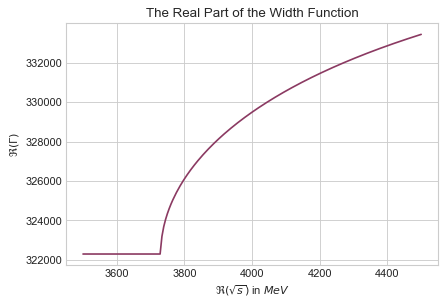

In [21]:
figure(figsize=(6, 4), dpi=80)
func5 = []
for j in range(0,len(listx)):
    func5.append(width(listx[j],mass,[la] + lb,[m1a] + m1b,[m2a] + m2b,[gFaka] + gFakb).real) 
plt.style.use('seaborn-whitegrid')
plt.plot(np.sqrt(listx).real, func5, color = '#8B3A62')
plt.xlabel(r'$\Re{(\sqrt{s})}$ in $MeV$')
plt.ylabel(r'$\Re{(\Gamma)}$')
plt.title(r'The Real Part of the Width Function')
plt.show()

The propagator now reads: 
$$ A_i(s) = \frac{N_i(s)}{M_{BW}^2-s-i\Gamma(s)}$$
Since we are now looking at more than one channel, the resonance can be observed in multible channels as well. In the following I will give a plot for the resonance observed in channel a and observed in channel $b_0$.

In [22]:
#implement the propagator of the relativistic Breit-Wigner lineshape in channel a
def amp_a(s,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b):
    gFak = [gFaka] + gFakb
    m1 = [m1a] + m1b
    m2 = [m2a] + m2b
    li = [la] + lb
    return num(s,alpha,la,m1a,m2a,gFaka) /  (mass**2-s-1j*(width(s,mass,li,m1,m2,gFak)))

In [23]:
#implement the propagator of the relativistic Breit-Wigner lineshape in channel b_0
def amp_b(s,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b):
    gFak = [gFaka] + gFakb
    m1 = [m1a] + m1b
    m2 = [m2a] + m2b
    li = [la] + lb
    return num(s,alpha,lb[0],m1b[0],m2b[0],gFakb[0]) /  (mass**2-s-1j*(width(s,mass,li,m1,m2,gFak)))

In [36]:
print('start diagramm:'+datetime.now().strftime("(%H:%M:%S.%f)"))

#choose an imaginary part, that you want to plot your function for (the absolute value of the amplitude is a family of functions depending on the imaginary part of s):
imag = 0

#plot ranges:
#insert ranges for sqrt(s) (of the x axis):
xaxisL = left
xaxisU = right

#calculate the needed ranges for s:
lowlim = xaxisL**2
uplim = xaxisU**2


sReal=np.linspace(lowlim,uplim,num=800)

def newF3(sReal,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b):
    list = []
    for i in sReal:
        s = complex(i,imag)
        res = abs(amp_a(s,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b))**2*rho(s,m1a,m2a).real
        list.append(res)
    return list

def integrate3(la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b):
    #number of grid points:
    n = 11
    #size of one intervall:
    h = (uplim - lowlim) / (n-1)
    #make a list with all of the gridpoints that we are using:
    list = np.linspace(lowlim, uplim, n)
    #calculate the function at these grid points
    func = newF3(list,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b)
    #now calculate the integral:
    riemannL = h * sum(func[:n-1])
    return riemannL

def normalize3(sReal,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b):
    res = []
    for i in range(0,len(sReal)):
        interim = abs(amp_a(complex(sReal[i],imag),la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b))**2*rho(complex(sReal[i],imag),m1a,m2a).real
        res.append(interim/( integrate3(la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b)))
    return res

    
trace_a = go.Scatter(x=np.sqrt(sReal), y= normalize3(sReal,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b))

lineshape1D = go.FigureWidget(data=[trace_a],
                    layout=go.Layout(
                        title=dict(
                            text=r'$\textrm{Relativistic Breit-Wigner parameterization in channel }a$'
                        ),
                        xaxis=dict(showline=True, zeroline=True, showgrid=True, showticklabels=True, linecolor = "Black", title=dict(text=r'$\sqrt{\Re{(s)}} \quad \textrm{[MeV]}$')),
                        yaxis=dict(showline=True, zeroline=True, showgrid=True, showticklabels=True, linecolor = "Black", title=dict(text=r'$|A|^2_a \cdot \Re{\rho_a}$'))
                    ))

#set the size of the plot:
lineshape1D.layout.autosize = False
lineshape1D.layout.width=650
lineshape1D.layout.height = 600

lineshape1D.layout.plot_bgcolor="white"
lineshape1D.update_traces(line=dict(color="Blue", width=1.5))

lineshape1D.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
lineshape1D.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
lineshape1D.update_yaxes(zeroline=True, zerolinewidth=2, zerolinecolor='LightGrey')


#initialise all widgets in an interact enviroment and define an update function, that is called as soon as a parameter is changed using one of the widgets and immediately changes the plot:
def update(momentum_a = la, BreitWignerMass = mass, Alpha = alpha, Mass1 = m1a, Mass2 = m2a, Coupling_a = gFaka, momentum_b_0 = lb[0], coupling_b_0 = gFakb[0], mass1_b_0=m1b[0],mass2_b_0=m2b[0]):
    with lineshape1D.batch_update(): 
        lineshape1D.data[0].x = np.sqrt(sReal)
        lineshape1D.data[0].y = normalize3(sReal,momentum_a,BreitWignerMass,Alpha,Mass1,Mass2,Coupling_a,[momentum_b_0],[coupling_b_0],[mass1_b_0],[mass2_b_0])
        
w=interactive(update,
              momentum_a = widgets.IntSlider(value=la,min=0,max=2,step=1,description=r'l$_a$:'),
              BreitWignerMass = widgets.IntSlider(min=0.0,max=2.0*mass,step=1.0,value=mass,description=r'M$_{\text{BW}}$:'),
              Alpha = widgets.IntSlider(value=alpha,min=alpha-2, max=alpha + 2,step=1,description=r'$\alpha$:'),
              Mass1 = widgets.IntSlider(value=m1a,min=0,max=2*m1a,step=1,description=r'm$_1^a$:'),
              Mass2 =  widgets.IntSlider(value=m2a,min=0,max=2*m2a,step=1,description=r'm$_2^a$:'),
              Coupling_a = widgets.FloatSlider(value=gFaka,min=0,max=10000.0,step=0.1,description=r'g$_a$'),    
              momentum_b_0 = widgets.IntSlider(value=lb[0],min=0,max=2,step=1,description=r'l$_b$'),
              coupling_b_0 = widgets.FloatSlider(value=gFakb[0],min=0.0,max=10000.0,step=0.1,description=r'g$_b$:'),
              mass1_b_0 = widgets.IntSlider(value=m1b[0],min=0.0,max=2*m1b[0],step=1,description=r'm$_1^b$:'),
              mass2_b_0 = widgets.IntSlider(value=m2b[0],min=0.0,max=2*m2b[0],step=1,description=r'm$_2^b$:'))


box_layout = Layout(display='flex', flex_flow='row', justify_content='space-between', align_items='center')
Hbox_layout = Layout(display='flex', flex_flow='column', justify_content='space-between', align_items='center')


h1 = HBox([w.children[0],w.children[1]], layout=Hbox_layout)
h2 = HBox([w.children[2],w.children[3]], layout=Hbox_layout)
hSum_12 = HBox([h1,h2], layout=Hbox_layout)
h3 = HBox([w.children[4],w.children[5]], layout=Hbox_layout)
h4 = HBox([w.children[6],w.children[7]], layout=Hbox_layout)
hSum_34 = HBox([h3,h4], layout=Hbox_layout)
h5 = HBox([w.children[8],w.children[9]], layout=Hbox_layout)
#hSum_56 = HBox([h5,w.children[10]], layout=Hbox_layout)

#creating a large hbox:
HSum_first = HBox([hSum_12,hSum_34], layout=Hbox_layout)
HSum_final = HBox([HSum_first,h5], layout=Hbox_layout)

display(VBox([lineshape1D,HSum_final], layout=box_layout))
lineshape1D.write_image("images/wigner_3a.pdf")
print('end diagramm:'+datetime.now().strftime("(%H:%M:%S.%f)"))

start diagramm:(14:14:37.393436)


    'data': [{'line': {'color': 'Blue', 'width': 1.5},
              'type': 'sc…

end diagramm:(14:14:37.976588)


In [37]:
print('start diagramm:'+datetime.now().strftime("(%H:%M:%S.%f)"))

#choose an imaginary part, that you want to plot your function for (the absolute value of the amplitude is a family of functions depending on the imaginary part of s):
imag = 0

#plot ranges:
#insert ranges for sqrt(s) (of the x axis):
xaxisL = left
xaxisU = right

#calculate the needed ranges for s:
lowlim = xaxisL**2
uplim = xaxisU**2


sReal=np.linspace(lowlim,uplim,num=3800)

def newF(sReal,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b):
    list = []
    for i in sReal:
        s = complex(i,imag)
        res = abs(amp_b(s,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b))**2*rho(s,m1b[0],m2b[0]).real
        list.append(res)
    return list

def integrate(la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b):
    #number of grid points:
    n = 11
    #size of one intervall:
    h = (uplim - lowlim) / (n-1)
    #make a list with all of the gridpoints that we are using:
    list = np.linspace(lowlim, uplim, n)
    #calculate the function at these grid points
    func = newF(list,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b)
    #now calculate the integral:
    riemannL = h * sum(func[:n-1])
    return riemannL

def normalize(sReal,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b):
    res = []
    for i in range(0,len(sReal)):
        interim = abs(amp_b(complex(sReal[i],imag),la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b))**2*rho(complex(sReal[i],imag),m1b[0],m2b[0]).real
        res.append(interim/( integrate(la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b)))
    return res

    
trace = go.Scatter(x=np.sqrt(sReal), y= normalize(sReal,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b))

lineshapeB = go.FigureWidget(data=[trace],
                    layout=go.Layout(
                        title=dict(
                            text=r'$\textrm{Relativistic Breit-Wigner parameterization in channel }b_0$'
                        ),
                        xaxis=dict(showline=True, zeroline=True, showgrid=True, showticklabels=True, linecolor = "Black", title=dict(text=r'$\sqrt{\Re{(s)}} \quad \textrm{[MeV]}$')),
                        yaxis=dict(showline=True, zeroline=True, showgrid=True, showticklabels=True, linecolor = "Black", title=dict(text=r'$|A|^2_{b_0} \cdot \Re{\rho_{b_0}}$'))
                    ))

#set the size of the plot:
lineshapeB.layout.autosize = False
lineshapeB.layout.width=650
lineshapeB.layout.height = 600

lineshapeB.layout.plot_bgcolor="white"
lineshapeB.update_traces(line=dict(color="Blue", width=1.5))

lineshapeB.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
lineshapeB.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
lineshapeB.update_yaxes(zeroline=True, zerolinewidth=2, zerolinecolor='LightGrey')


#initialise all widgets in an interact enviroment and define an update function, that is called as soon as a parameter is changed using one of the widgets and immediately changes the plot:
def update(momentum_a = la, BreitWignerMass = mass, Alpha = alpha, Mass1 = m1a, Mass2 = m2a, Coupling_a = gFaka, momentum_b_0 = lb[0], coupling_b_0 = gFakb[0], mass1_b_0=m1b[0],mass2_b_0=m2b[0]):
    with lineshapeB.batch_update(): 
        lineshapeB.data[0].x = np.sqrt(sReal)
        lineshapeB.data[0].y = normalize(sReal,momentum_a,BreitWignerMass,Alpha,Mass1,Mass2,Coupling_a,[momentum_b_0],[coupling_b_0],[mass1_b_0],[mass2_b_0])
        
w=interactive(update,
              momentum_a = widgets.IntSlider(value=la,min=0,max=2,step=1,description=r'l$_a$:'),
              BreitWignerMass = widgets.IntSlider(min=0.0,max=2.0*mass,step=1.0,value=mass,description=r'M$_{\text{BW}}$:'),
              Alpha = widgets.IntSlider(value=alpha,min=alpha-2, max=alpha + 2,step=1,description=r'$\alpha$:'),
              Mass1 = widgets.IntSlider(value=m1a,min=0,max=2*m1a,step=1,description=r'm$_1^a$:'),
              Mass2 =  widgets.IntSlider(value=m2a,min=0,max=2*m2a,step=1,description=r'm$_2^a$:'),
              Coupling_a = widgets.FloatSlider(value=gFaka,min=0,max=10000.0,step=0.1,description=r'g$_a$'),    
              momentum_b_0 = widgets.IntSlider(value=lb[0],min=0,max=2,step=1,description=r'l$_b$'),
              coupling_b_0 = widgets.FloatSlider(value=gFakb[0],min=0.0,max=10000.0,step=0.1,description=r'g$_b$:'),
              mass1_b_0 = widgets.IntSlider(value=m1b[0],min=0.0,max=2*m1b[0],step=1,description=r'm$_1^b$:'),
              mass2_b_0 = widgets.IntSlider(value=m2b[0],min=0.0,max=2*m2b[0],step=1,description=r'm$_2^b$:'))


box_layout = Layout(display='flex', flex_flow='row', justify_content='space-between', align_items='center')
Hbox_layout = Layout(display='flex', flex_flow='column', justify_content='space-between', align_items='center')


h1 = HBox([w.children[0],w.children[1]], layout=Hbox_layout)
h2 = HBox([w.children[2],w.children[3]], layout=Hbox_layout)
hSum_12 = HBox([h1,h2], layout=Hbox_layout)
h3 = HBox([w.children[4],w.children[5]], layout=Hbox_layout)
h4 = HBox([w.children[6],w.children[7]], layout=Hbox_layout)
hSum_34 = HBox([h3,h4], layout=Hbox_layout)
h5 = HBox([w.children[8],w.children[9]], layout=Hbox_layout)
#hSum_56 = HBox([h5,w.children[10]], layout=Hbox_layout)

#creating a large hbox:
HSum_first = HBox([hSum_12,hSum_34], layout=Hbox_layout)
HSum_final = HBox([HSum_first,h5], layout=Hbox_layout)

display(VBox([lineshapeB,HSum_final], layout=box_layout))
lineshapeB.write_image("images/wigner_3b.pdf")
print('end diagramm:'+datetime.now().strftime("(%H:%M:%S.%f)"))

start diagramm:(14:15:36.974142)


    'data': [{'line': {'color': 'Blue', 'width': 1.5},
              'type': 'sc…

end diagramm:(14:15:38.856287)


### Comparison of the single channel and constant width Breit-Wigner lineshape with the relativistic Breit-Wigner lineshape

Last but not least, let's compare the relativistic Breit-Wigner lineshape with the single channel Breit-Wigner lineshape of constant width:

In [26]:
#trace1 and trace2 shouls already be defined
#choose an imaginary part, that you want to plot your function for (the absolute value of the amplitude is a family of functions depending on the imaginary part of s):
imag = 0

#plot ranges:
#insert ranges for sqrt(s) (of the x axis):
xaxisL = left
xaxisU = right

#calculate the needed ranges for s:
lowlim = xaxisL**2
uplim = xaxisU**2

sReal=np.linspace(lowlim,uplim,num=4000)

trace1 = go.Scatter(x=np.sqrt(sReal), y= normalise1(sReal,la,mass,alpha,m1a,m2a,gFaka,delta,aTilde), name = 'single channel, constant width',opacity=0.9) #constant width
trace_a = go.Scatter(x=np.sqrt(sReal), y= normalize3(sReal,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b), name = 'multichannel, relativistic',opacity=0.9)

lineshapeComp2 = go.FigureWidget(data=[trace1,trace_a],
                    layout=go.Layout(
                        title=dict(
                            text=r'$\textrm{Comparison of Breit-Wigner lineshapes}$'
                        ),
                        xaxis=dict(showline=True, zeroline=True, showgrid=True, showticklabels=True, linecolor = "Black", title=dict(text=r'$\sqrt{\Re{(s)}} \quad \textrm{[MeV]}$')),
                        yaxis=dict(showline=True, zeroline=True, showgrid=True, showticklabels=True, linecolor = "Black", title=dict(text=r'$|A|^2_a \cdot \Re{\rho_a}$'))
                    ))

#set the size of the plot:
lineshapeComp2.layout.autosize = False
lineshapeComp2.layout.width=650
lineshapeComp2.layout.height = 600

lineshapeComp2.layout.plot_bgcolor="white"
lineshapeComp2.update_traces(line=dict(width=1.5))

lineshapeComp2.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
lineshapeComp2.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
lineshapeComp2.update_yaxes(zeroline=True, zerolinewidth=2, zerolinecolor='LightGrey')



#initialise all widgets in an interact enviroment and define an update function, that is called as soon as a parameter is changed using one of the widgets and immediately changes the plot:
def update(BreitWignerMass = mass, Delta = delta, Alpha = alpha, Mass1 = m1a, Mass2 = m2a, Coupling_a = gFaka, momentum_a = la,momentum_b_0 = lb[0], coupling_b_0 = gFakb[0], mass1_b_0=m1b[0],mass2_b_0=m2b[0], Tild = aTilde):
    with lineshapeComp2.batch_update(): 
        lineshapeComp2.data[0].x = np.sqrt(sReal)
        lineshapeComp2.data[1].x = np.sqrt(sReal)
        lineshapeComp2.data[0].y = normalise1(sReal,momentum_a,BreitWignerMass,Alpha,Mass1,Mass2,Coupling_a,Delta,Tild)
        lineshapeComp2.data[1].y = normalize3(sReal,momentum_a,BreitWignerMass,Alpha,Mass1,Mass2,Coupling_a,[momentum_b_0],[coupling_b_0],[mass1_b_0],[mass2_b_0])
        
w=interactive(update,
              momentum_a = widgets.IntSlider(value=la,min=0,max=2,step=1,description=r'l$_a$:'),
              BreitWignerMass = widgets.IntSlider(min=0.0,max=2.0*mass,step=1.0,value=mass,description=r'M$_{\text{BW}}$:'),
              Alpha = widgets.IntSlider(value=alpha,min=alpha-2, max=alpha + 2,step=1,description=r'$\alpha$:'),
              Mass1 = widgets.IntSlider(value=m1a,min=0,max=2*m1a,step=1,description=r'm$_1^a$:'),
              Mass2 =  widgets.IntSlider(value=m2a,min=0,max=2*m2a,step=1,description=r'm$_2^a$:'),
              Coupling_a = widgets.FloatSlider(value=gFaka,min=0,max=10000.0,step=0.1,description=r'g$_a$'),    
              momentum_b_0 = widgets.IntSlider(value=lb[0],min=0,max=2,step=1,description=r'l$_b$'),
              coupling_b_0 = widgets.FloatSlider(value=gFakb[0],min=0.0,max=10000.0,step=0.1,description=r'g$_b$:'),
              mass1_b_0 = widgets.IntSlider(value=m1b[0],min=0.0,max=2*m1b[0],step=1,description=r'm$_1^b$:'),
              mass2_b_0 = widgets.IntSlider(value=m2b[0],min=0.0,max=2*m2b[0],step=1,description=r'm$_2^b$:'),
              Delta = widgets.FloatSlider(value = delta, min = 0.0, max= 3*delta, step=0.1, description = r'$\Gamma$:'),
              Tild = widgets.FloatSlider(value = aTilde, min = 0.0, max= 3*aTilde, step=0.1, description = r'$\tilde{\alpha}$:'))


box_layout = Layout(display='flex', flex_flow='row', justify_content='space-between', align_items='center')
Hbox_layout = Layout(display='flex', flex_flow='column', justify_content='space-between', align_items='center')


h1 = HBox([w.children[0],w.children[1]], layout=Hbox_layout)
h2 = HBox([w.children[2],w.children[3]], layout=Hbox_layout)
hSum_12 = HBox([h1,h2], layout=Hbox_layout)
h3 = HBox([w.children[4],w.children[5]], layout=Hbox_layout)
h4 = HBox([w.children[6],w.children[7]], layout=Hbox_layout)
hSum_34 = HBox([h3,h4], layout=Hbox_layout)
h5 = HBox([w.children[8],w.children[9]], layout=Hbox_layout)
h6 = HBox([w.children[10],w.children[11]], layout=Hbox_layout)
hSum_56 = HBox([h5,h6], layout=Hbox_layout)

#creating a large hbox:
HSum_first = HBox([hSum_12,hSum_34], layout=Hbox_layout)
HSum_final = HBox([HSum_first,hSum_56], layout=Hbox_layout)

display(VBox([lineshapeComp2,HSum_final], layout=box_layout))
lineshapeComp2.write_image("images/wigner_comp2.pdf")
print('end diagramm:'+datetime.now().strftime("(%H:%M:%S.%f)"))

    'data': [{'line': {'width': 1.5},
              'name': 'single channel, con…

end diagramm:(10:41:04.029771)


In [27]:
#keep track of the execution time:
print('end programm:'+datetime.now().strftime("(%H:%M:%S.%f)"))

end programm:(10:41:04.032875)
